
# Data Preprocessing for Heart Disease Dataset

## Overview
This notebook addresses the data format inconsistencies found in four different datasets: `switzerland.data`, `hungarian.data`, `long-beach-va.data`, and `cleveland.data`. Each dataset contains a varying number of columns across lines, and `cleveland.data` has a line with `NULL` values after line 2820, which must be removed for consistency. The goal is to transform these datasets into a single CSV file with 76 columns that correspond to the full list of attributes.


# Data Column 

The following inconsistencies in column numbers were observed across different lines in the dataset. 

| Line Number | Number of Columns |
|-------------|-------------------|
| Line 1      | 7 columns         |
| Line 2      | 8 columns         |
| Line 3      | 8 columns         |
| Line 4      | 8 columns         |
| Line 5      | 8 columns         |
| Line 6      | 8 columns         |
| Line 7      | 8 columns         |
| Line 8      | 8 columns         |
| Line 9      | 8 columns         |
| Line 10     | 5 columns         |

- This pattern continues, with most lines matching the 76 attributes needed.

After observing these files, I found a repeating pattern every 10 lines, where data attributes align with a total of 76 columns. This pattern allows us to process the files by batching lines and assigning attribute names accordingly.

**Note:** The `cleveland.data` file contains `NULL` entries after line 2820. These lines were removed for processing.


In [ ]:
import pandas as pd

# with open('cleveland.data', 'r',encoding='ISO-8859-1') as file:
with open('switzerland.data', 'r') as file:
    lines = file.readlines()
    
# 限制只读取前 2820 行
# lines = lines[:2820]

sample_size = 10  
combined_data = []

for i in range(0, len(lines), sample_size):
    sample = []
    for j in range(sample_size):
        if i + j < len(lines): 
            columns = lines[i + j].strip().split()  
            sample.extend(columns)  
    combined_data.append(sample)

columns = [
    'id', 'ccf', 'age', 'sex', 'painloc', 'painexer', 'relrest', 'pncaden', 'cp', 
    'trestbps', 'htn', 'chol', 'smoke', 'cigs', 'years', 'fbs', 'dm', 'famhist', 
    'restecg', 'ekgmo', 'ekgday', 'ekgyr', 'dig', 'prop', 'nitr', 'pro', 'diuretic', 
    'proto', 'thaldur', 'thaltime', 'met', 'thalach', 'thalrest', 'tpeakbps', 'tpeakbpd', 
    'dummy', 'trestbpd', 'exang', 'xhypo', 'oldpeak', 'slope', 'rldv5', 'rldv5e', 'ca', 
    'restckm', 'exerckm', 'restef', 'restwm', 'exeref', 'exerwm', 'thal', 'thalsev', 
    'thalpul', 'earlobe', 'cmo', 'cday', 'cyr', 'num', 'lmt', 'ladprox', 'laddist', 
    'diag', 'cxmain', 'ramus', 'om1', 'om2', 'rcaprox', 'rcadist', 'lvx1', 'lvx2', 
    'lvx3', 'lvx4', 'lvf', 'cathef', 'junk', 'name'
]

df = pd.DataFrame(combined_data, columns=columns)

print("\nMerged DataFrame (first few rows):")
print(df.head())

df.to_csv('switzerland_merged.csv', index=False)




Merged DataFrame (first few rows):
     id ccf age sex painloc painexer relrest pncaden cp trestbps  ... rcaprox  \
0  3001   0  65   1       1        1       1      -9  4      115  ...       1   
1  3002   0  32   1       0        0       0      -9  1       95  ...       1   
2  3003   0  61   1       1        1       1      -9  4      105  ...       2   
3  3004   0  50   1       1        1       1      -9  4      145  ...       1   
4  3005   0  57   1       1        1       1      -9  4      110  ...       2   

  rcadist lvx1 lvx2 lvx3 lvx4 lvf cathef junk  name  
0       1    1    1    1    1   1     75  -9.  name  
1       1    1    1    1    5   1     63  -9.  name  
2       1    1    1    1    1   1     67  -9.  name  
3       1    1    1    1    5   4     36  -9.  name  
4       1    1    1    1    1   1     60  -9.  name  

[5 rows x 76 columns]


### 1. `id`
- **Description**: A unique identification number assigned to each patient for tracking purposes. It is used as a key identifier for each record.
- **Data Type**: Integer

### 2. `ccf`
- **Description**: Social Security Number (SSN) of the patient. For privacy reasons, the SSN is replaced with a dummy value of 0.
- **Data Type**: Integer

### 3. `age`
- **Description**: The age of the patient in years. This is a continuous variable representing how old the patient is at the time of the data collection.
- **Data Type**: Integer

### 4. `sex`
- **Description**: The biological sex of the patient. The values are coded as:
    - `1`: Male
    - `0`: Female
- **Data Type**: Integer

### 5. `painloc`
- **Description**: Indicates the location of the chest pain. 
    - `1`: Substernal (pain beneath the sternum)
    - `0`: Other locations (indicating chest pain is not substernal)
- **Data Type**: Integer

### 6. `painexer`
- **Description**: Whether the chest pain is provoked by exertion or physical activity. 
    - `1`: Yes, the pain occurs during exertion
    - `0`: No, the pain is not related to exertion
- **Data Type**: Integer

### 7. `relrest`
- **Description**: Whether the chest pain is relieved after rest.
    - `1`: Yes, pain is relieved after rest
    - `0`: No, pain is not relieved by resting
- **Data Type**: Integer

### 8. `pncaden`
- **Description**: A cumulative score representing the chest pain characteristics based on the attributes `painloc`, `painexer`, and `relrest`. It is the sum of these three variables, which together describe the patient's chest pain pattern.
- **Data Type**: Integer

### 9. `cp`
- **Description**: Type of chest pain experienced by the patient. The values are coded as:
    - `1`: Typical angina (pain occurs during physical exertion and is relieved by rest)
    - `2`: Atypical angina (less predictable, may not follow typical patterns)
    - `3`: Non-anginal pain (chest pain that is not related to heart problems)
    - `4`: Asymptomatic (no chest pain or symptoms)
- **Data Type**: Categorical (Integer)

### 10. `trestbps`
- **Description**: The patient's resting blood pressure, measured in millimeters of mercury (mm Hg). This value is typically obtained while the patient is at rest.
- **Data Type**: Integer

### 11. `htn`
- **Description**: Indicates whether the patient has hypertension (high blood pressure).
    - `1`: Yes, the patient has hypertension
    - `0`: No, the patient does not have hypertension
- **Data Type**: Integer

### 12. `chol`
- **Description**: The patient's serum cholesterol level, measured in milligrams per deciliter (mg/dl). Cholesterol levels are indicative of cardiovascular health.
- **Data Type**: Integer

### 13. `smoke`
- **Description**: Indicates whether the patient is a smoker.
    - `1`: Smoker (the patient currently smokes)
    - `0`: Non-smoker (the patient does not smoke)
- **Data Type**: Integer

### 14. `cigs`
- **Description**: The number of cigarettes the patient smokes per day. This is a continuous variable that quantifies smoking habits.
- **Data Type**: Integer

### 15. `years`
- **Description**: The number of years the patient has been smoking. This reflects the duration of the patient's smoking habit.
- **Data Type**: Integer

### 16. `fbs`
- **Description**: Indicates whether the patient's fasting blood sugar level is greater than 120 mg/dl.
    - `1`: True, the fasting blood sugar level is greater than 120 mg/dl
    - `0`: False, the fasting blood sugar level is less than or equal to 120 mg/dl
- **Data Type**: Integer

### 17. `dm`
- **Description**: Indicates whether the patient has a history of diabetes.
    - `1`: Yes, the patient has a history of diabetes
    - `0`: No, the patient does not have diabetes
- **Data Type**: Integer

### 18. `famhist`
- **Description**: Indicates whether there is a family history of coronary artery disease.
    - `1`: Yes, the patient has a family history of coronary artery disease
    - `0`: No, the patient does not have a family history of coronary artery disease
- **Data Type**: Integer

### 19. `restecg`
- **Description**: The results of the resting electrocardiogram (ECG) test. This test evaluates the electrical activity of the heart to check for irregularities.
    - `0`: Normal
    - `1`: ST-T wave abnormality (abnormalities in the heart's electrical activity)
    - `2`: Probable or definite left ventricular hypertrophy (LVH) (thickening of the heart's left ventricle)
- **Data Type**: Categorical (Integer)


### 20-22. `ekgmo`, `ekgday`, `ekgyr`
- **Description**: The date when the exercise electrocardiogram (ECG) reading was taken. The data is split into three variables:
    - `ekgmo`: Month of the ECG reading.
    - `ekgday`: Day of the ECG reading.
    - `ekgyr`: Year of the ECG reading.
- **Data Type**: Integer (for each variable)

### 23. `dig`
- **Description**: Indicates whether digitalis (a medication) was used during the exercise ECG.
    - `1`: Yes, digitalis was used
    - `0`: No, digitalis was not used
- **Data Type**: Integer

### 24. `prop`
- **Description**: Indicates whether a beta-blocker was used during the exercise ECG.
    - `1`: Yes, beta-blocker was used
    - `0`: No, beta-blocker was not used
- **Data Type**: Integer

### 25. `nitr`
- **Description**: Indicates whether nitrates were used during the exercise ECG.
    - `1`: Yes, nitrates were used
    - `0`: No, nitrates were not used
- **Data Type**: Integer

### 26. `pro`
- **Description**: Indicates whether a calcium channel blocker was used during the exercise ECG.
    - `1`: Yes, calcium channel blocker was used
    - `0`: No, calcium channel blocker was not used
- **Data Type**: Integer

### 27. `diuretic`
- **Description**: Indicates whether a diuretic (a medication that helps remove excess fluids) was used during the exercise ECG.
    - `1`: Yes, diuretic was used
    - `0`: No, diuretic was not used
- **Data Type**: Integer

### 28. `proto`
- **Description**: The type of exercise protocol used during the ECG exercise test. The values represent different types of protocols such as Bruce, Kottus, Balke, etc.
    - `1` to `12`: Various exercise protocols used to assess heart function under stress.
- **Data Type**: Categorical (Integer)

### 29. `thaldur`
- **Description**: The duration of the exercise test, measured in minutes. This represents how long the patient was able to perform the exercise.
- **Data Type**: Float

### 30. `thaltime`
- **Description**: The time (in minutes) when ST depression (a sign of ischemia or lack of oxygen in the heart) was first noted during the exercise.
- **Data Type**: Float

### 31. `met`
- **Description**: The number of metabolic equivalents (METs) achieved during the exercise test. METs are used to measure the intensity of exercise, with 1 MET being the energy expenditure while at rest.
- **Data Type**: Float

### 32. `thalach`
- **Description**: The maximum heart rate achieved during the exercise test, measured in beats per minute (bpm). This is an indicator of the patient's cardiovascular response to exercise.
- **Data Type**: Integer

### 33. `thalrest`
- **Description**: The resting heart rate of the patient, measured in beats per minute (bpm), before starting the exercise test.
- **Data Type**: Integer

### 34-35. `tpeakbps`, `tpeakbpd`
- **Description**: The peak blood pressure measurements during the exercise ECG, both systolic and diastolic.
    - `tpeakbps`: Peak systolic blood pressure achieved during the exercise.
    - `tpeakbpd`: Peak diastolic blood pressure achieved during the exercise.
- **Data Type**: Integer (for each)

### 36. `dummy`
- **Description**: A dummy variable with unknown relevance in the dataset. It does not have a clearly defined role or explanation and may be used as a placeholder.
- **Data Type**: Integer

### 37. `trestbpd`
- **Description**: The resting diastolic blood pressure of the patient, measured in mm Hg. This value is taken when the patient is at rest.
- **Data Type**: Integer

### 38. `exang`
- **Description**: Indicates whether the patient experienced exercise-induced angina (chest pain during physical activity).
    - `1`: Yes, the patient had exercise-induced angina
    - `0`: No, the patient did not experience angina during exercise
- **Data Type**: Integer

### 39. `xhypo`
- **Description**: This variable is unknown but is possibly related to hypotension (low blood pressure).
    - `1`: Yes, may indicate hypotension
    - `0`: No, no indication of hypotension
- **Data Type**: Integer

### 40. `oldpeak`
- **Description**: The amount of ST depression observed during exercise, relative to the resting state. ST depression is a sign of ischemia or reduced oxygen supply to the heart muscle.
- **Data Type**: Float
### 41. `slope`
- **Description**: The slope of the peak exercise ST segment, which helps assess the heart's electrical activity during exercise. The values are:
    - `1`: Upsloping (indicating improved electrical activity during exercise)
    - `2`: Flat (indicating no significant change in electrical activity)
    - `3`: Downsloping (indicating a potential issue, such as ischemia)
- **Data Type**: Categorical (Integer)

### 42-43. `rldv5`, `rldv5e`
- **Description**: These variables represent the height measurements of the patient at two stages:
    - `rldv5`: Height at rest (before exercise)
    - `rldv5e`: Height at peak exercise (after exercise)
- **Data Type**: Float (for each)

### 44. `ca`
- **Description**: The number of major coronary arteries that show significant narrowing, identified by fluoroscopy (a type of X-ray imaging). This value helps assess the extent of coronary artery disease.
- **Data Type**: Integer

### 45-46. `restckm`, `exerckm`
- **Description**: These attributes are considered irrelevant and do not contribute to the analysis of the data.
- **Data Type**: Unknown

### 47. `restef`
- **Description**: The resting radionuclide ejection fraction (EF), which measures the percentage of blood being pumped out of the left ventricle with each heartbeat while at rest. A normal EF is typically above 50%.
- **Data Type**: Float

### 48. `restwm`
- **Description**: Indicates the resting wall motion abnormality in the heart, based on imaging results. The values are:
    - `0`: None (no wall motion abnormality)
    - `1`: Mild or moderate (slight abnormality)
    - `2`: Moderate or severe (more noticeable abnormality)
    - `3`: Akinesis or dyskinesis (complete loss of motion or abnormal movement)
- **Data Type**: Categorical (Integer)

### 49. `exeref`
- **Description**: The exercise radionuclide ejection fraction (EF), which measures the percentage of blood ejected from the left ventricle during exercise. This is similar to the resting EF but during physical activity.
- **Data Type**: Float

### 50. `exerwm`
- **Description**: Indicates the presence of wall motion abnormalities during exercise. This variable captures any issues with the heart's wall movement when stressed by exercise.
- **Data Type**: Categorical (Integer)

### 51. `thal`
- **Description**: The result of a thallium heart scan, which is used to detect areas of reduced blood flow in the heart. The values are:
    - `3`: Normal (no issues detected)
    - `6`: Fixed defect (permanent abnormality, often due to scar tissue)
    - `7`: Reversible defect (temporary abnormality, usually caused by ischemia)
- **Data Type**: Categorical (Integer)

### 52-55. `thalsev`, `thalpul`, `earlobe`, `cmo`
- **Description**: These attributes are not used in the analysis and are likely irrelevant or placeholders in the dataset.
- **Data Type**: Unknown

### 56-57. `cday`, `cyr`
- **Description**: The day and year of the cardiac catheterization procedure. The data is split into two variables:
    - `cday`: Day of the cardiac catheterization.
    - `cyr`: Year of the cardiac catheterization.
- **Data Type**: Integer (for each)

### 58. `num`
- **Description**: A binary variable that indicates the diagnosis of heart disease based on angiographic findings, which assess the narrowing of coronary arteries:
    - `0`: Less than 50% diameter narrowing (no significant blockage)
    - `1`: More than 50% diameter narrowing (indicating significant coronary artery disease)
- **Data Type**: Integer

### 59-68. `lmt` to `rcadist`
- **Description**: These variables represent the vessels affected by coronary artery disease, recorded as binary values (indicating presence or absence of disease in each vessel):
    - `lmt`: Left main coronary artery
    - `rcadist`: Right coronary artery distal (further sections of the right coronary artery)
    - Similar variables exist for other coronary arteries.
- **Data Type**: Integer (for each)

### 69-73. `lvx1` to `lvx5`
- **Description**: These variables are unknown but are likely related to left ventricular measurements, such as volume or function. Their exact purpose is unclear.
- **Data Type**: Float (for each)

### 74-76. `lvf`, `cathef`, `junk`
- **Description**: These attributes are considered unused or junk variables in the dataset and do not have any defined purpose.
- **Data Type**: Unknown


In [34]:
import pandas as pd

# 读取四个 CSV 文件
cleveland_df = pd.read_csv('cleveland_merged.csv')
hungarian_df = pd.read_csv('hungarians_merged.csv')
long_beach_df = pd.read_csv('long-beach-va_merged.csv')
switzerland_df = pd.read_csv('switzerland_merged.csv')

# 合并四个 DataFrame
combined_df = pd.concat([cleveland_df, hungarian_df, long_beach_df, switzerland_df], ignore_index=True)

# 打印合并后的数据，检查前几行
print(f"Combined DataFrame shape: {combined_df.shape}")
print(combined_df.head())

# 保存合并后的数据为一个新的 CSV 文件
combined_df.to_csv('merged_all_data.csv', index=False)

print("The data has been successfully merged and saved as 'merged_all_data.csv'.")


Combined DataFrame shape: (899, 76)
   id  ccf  age  sex  painloc  painexer  relrest  pncaden  cp  trestbps  ...  \
0   1    0   63    1       -9        -9       -9       -9   1       145  ...   
1   2    0   67    1       -9        -9       -9       -9   4       160  ...   
2   3    0   67    1       -9        -9       -9       -9   4       120  ...   
3   4    0   37    1       -9        -9       -9       -9   3       130  ...   
4   6    0   41    0       -9        -9       -9       -9   2       130  ...   

   rcaprox  rcadist  lvx1  lvx2  lvx3  lvx4  lvf  cathef  junk  name  
0        1        1     1     1     1     1    1    -9.0  -9.0  name  
1        1        1     1     1     1     1    1    -9.0  -9.0  name  
2        2        2     1     1     1     7    3    -9.0  -9.0  name  
3        1        1     1     1     1     1    1    -9.0  -9.0  name  
4        1        1     1     1     1     1    1    -9.0  -9.0  name  

[5 rows x 76 columns]
The data has been successfully mer

# Feature Importance Analysis with Random Forest for Diabetes Data

This notebook demonstrates a machine learning pipeline for analyzing feature importance using a Random Forest Regressor on a diabetes-related dataset.

## Overview
The code performs data loading, preprocessing, model training, and evaluation. It includes the following steps:
1. **Data Loading and Preprocessing**: Loads the dataset, removes unnecessary columns (`name`, `id`), replaces error values (`-9` in target column `dm`), and standardizes features.
2. **Random Forest Training**: Trains a Random Forest Regressor to predict the target `dm` with tuned parameters.
3. **Model Testing**: Tests the model on the same dataset and calculates the Mean Squared Error (MSE) for performance evaluation.
4. **Feature Importance Evaluation**: Extracts and ranks feature importance from the trained model.
5. **Visualization and Saving Results**: Plots the feature importance for visual inspection and saves the rankings to a text file.


Mean Squared Error: 0.009969294771968853
Feature Importance:
     Feature  Importance
0        fbs    0.250027
1    thalach    0.038876
2       chol    0.037739
3     rldv5e    0.035629
4   thalrest    0.031609
..       ...         ...
68   earlobe    0.000000
69   exerckm    0.000000
70   restckm    0.000000
71   pncaden    0.000000
72       ccf    0.000000

[73 rows x 2 columns]
Feature importance saved to feature_importance.txt


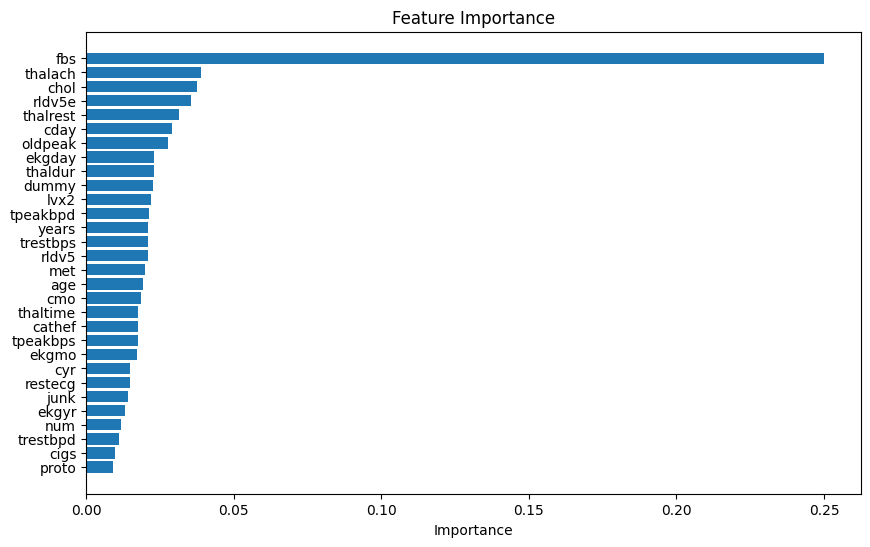

In [3]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

class DMDataLoader(Dataset):
    def __init__(self, file_path):

        data = pd.read_csv(file_path)
        
        self.features = data.drop(columns=["dm", "name", "id"])  
        self.target = data["dm"].replace(-9, 0)  
        
        scaler = StandardScaler()
        self.features = scaler.fit_transform(self.features)
        
        self.features = torch.tensor(self.features, dtype=torch.float32)
        self.target = torch.tensor(self.target.values, dtype=torch.float32)

    def __len__(self):
        return len(self.target)

    def __getitem__(self, idx):
        return self.features[idx], self.target[idx]


def create_dataloader(file_path, batch_size=32):
    dataset = DMDataLoader(file_path)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return dataloader

def train_random_forest(file_path, n_estimators=100, max_depth=None):
    data = pd.read_csv(file_path)
    X = data.drop(columns=["dm", "name", "id"]) 
    # X = data.drop(columns=["dm"]) 
    y = data["dm"].replace(-9, 0) 

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_scaled, y)

    return model, scaler, X.columns

def test_model(file_path, model, scaler):
    data = pd.read_csv(file_path)
    X = data.drop(columns=["dm", "name", "id"])
    # X = data.drop(columns=["dm"])
    y_true = data["dm"].replace(-9, 0)

    X_scaled = scaler.transform(X)
    y_pred = model.predict(X_scaled)

    mse = mean_squared_error(y_true, y_pred)
    print(f"Mean Squared Error: {mse}")

    return y_true, y_pred

def evaluate_feature_importance(model, feature_names):
    importance = model.feature_importances_
    feature_scores = pd.DataFrame({"Feature": feature_names, "Importance": importance})
    feature_scores = feature_scores.sort_values(by="Importance", ascending=False).reset_index(drop=True)
    return feature_scores

def plot_feature_importance(feature_scores):
    plt.figure(figsize=(10, 6))
    plt.barh(feature_scores["Feature"], feature_scores["Importance"])
    plt.xlabel("Importance")
    plt.title("Feature Importance")
    plt.gca().invert_yaxis()  
    plt.show()

def save_feature_importance_to_txt(feature_scores, file_name="feature_importance.txt"):
    with open(file_name, "w") as file:
        file.write("Features by Importance:\n")
        for idx, row in feature_scores.iterrows():
            file.write(f"{row['Feature']}: {row['Importance']}\n")
    print(f"Feature importance saved to {file_name}")

if __name__ == "__main__":
    file_path = "merged_all_data.csv"
    
    model, scaler, feature_names = train_random_forest(file_path, n_estimators=2000, max_depth=100)
    
    true_values, predictions = test_model(file_path, model, scaler)
    
    feature_scores = evaluate_feature_importance(model, feature_names)
    
    print("Feature Importance:")
    # print(feature_scores.head(22))  # 输出前22个重要的特征
    print(feature_scores.head(73))  # 输出前73个重要的特征
    
    save_feature_importance_to_txt(feature_scores)
    
    plot_feature_importance(feature_scores[:30])


# List of Relevant Columns Related to Diabetes

The following list includes columns selected for diabetes-related analysis. Each attribute provides insights into potential risk factors or related conditions:

- **age**: Age in years
- **sex**: Gender (1 = male; 0 = female)
- **fbs**: Fasting blood sugar (> 120 mg/dl; 1 = true, 0 = false)
- **dm**: History of diabetes mellitus (1 = yes; 0 = no)
- **chol**: Serum cholesterol level in mg/dl
- **smoke**: Smoking status (1 = yes; 0 = no)
- **cigs**: Cigarettes smoked per day
- **years**: Number of years as a smoker
- **famhist**: Family history of coronary artery disease (1 = yes; 0 = no)
- **exang**: Exercise-induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest
- **rldv5**: Height at rest
- **rldv5e**: Height at peak exercise
- **ca**: Number of major vessels (0-3) colored by fluoroscopy
- **num**: Diagnosis of heart disease based on angiographic status
    - 0: < 50% diameter narrowing
    - 1: > 50% diameter narrowing
- **trestbps**: Resting blood pressure (in mm Hg)
- **thaldur**: Duration of the exercise test in minutes
- **thaltime**: Time when ST depression was observed during exercise
- **thalach**: Maximum heart rate achieved
- **thalrest**: Resting heart rate
- **slope**: Slope of the peak exercise ST segment
    - 1: Upsloping
    - 2: Flat
    - 3: Downsloping
- **restecg**: Resting electrocardiographic results
    - 0: Normal
    - 1: ST-T wave abnormality
    - 2: Probable or definite left ventricular hypertrophy (by Estes' criteria)


In [35]:
import pandas as pd

# Load your original data
df = pd.read_csv('merged_all_data.csv')

# Extended list of relevant columns related to diabetes
diabetes_related_columns_extended = [
    'age', 'sex', 'fbs', 'dm', 'chol', 'smoke', 'cigs', 'years', 
    'famhist', 'exang', 'oldpeak', 'rldv5', 'rldv5e', 'ca', 'num', 
    'trestbps', 'thaldur', 'thaltime', 'thalach', 'thalrest', 
    'slope', 'restecg'
]

# Extract relevant columns from the DataFrame
extended_diabetes_data = df[diabetes_related_columns_extended]

# Handle missing values (optional)
extended_diabetes_data = extended_diabetes_data.dropna()  # Drop rows with missing values

# Inspect the first few rows
print(extended_diabetes_data.head())

# Save the refined data to a new CSV file
extended_diabetes_data.to_csv('extended_diabetes_related_data.csv', index=False)


   age  sex  fbs  dm  chol  smoke  cigs  years  famhist  exang  ...  rldv5e  \
0   63    1    1  -9   233     -9    50     20        1      0  ...     172   
1   67    1    0  -9   286     -9    40     40        1      1  ...     185   
2   67    1    0  -9   229     -9    20     35        1      1  ...     150   
3   37    1    0  -9   250     -9     0      0        1      0  ...     167   
4   41    0    0  -9   204     -9     0      0        1      0  ...      40   

   ca  num  trestbps  thaldur  thaltime  thalach  thalrest  slope  restecg  
0   0    0       145     10.5       6.0      150        60      3        2  
1   3    2       160      9.5       6.0      108        64      2        2  
2   2    1       120      8.5       6.0      129        78      2        2  
3   0    0       130     13.0      13.0      187        84      3        0  
4   0    0       130      7.0      -9.0      172        71      1        2  

[5 rows x 22 columns]
